In [2]:
from glob import glob
from os.path import join
import torch as pt
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

In [4]:
# Reading Post simulation data of Open-loop controlled rotation of Cylinder with frequceny 6hz
plt.rcParams["figure.dpi"] = 160
path = "/Users/sarvasvakhare/Desktop/exercises/openloop_control/A2f6/postProcessing/forces/0/coefficient.dat"
names = ["t", "cd", "cl"]
cdata = read_csv(path, skiprows=12, header=0, sep='\s+', usecols=[0, 1, 3], names=names)
cdata.head()

,t,cd,cl
0,0.0005,690.405161,345.202581
1,0.0010,9.532843,4.766421
2,0.0015,8.348993,4.174496
3,0.0020,7.535094,3.767547
4,0.0025,6.896484,3.448242


In [6]:
# Reading Post simulation data of flow past a stationary cylinder
path = "/Users/sarvasvakhare/Desktop/exercises/openloop_control/cylinder2D/postProcessing/forces/0/coefficient.dat"
names = ["t", "cd", "cl"]
data = read_csv(path, skiprows=12, header=0, sep='\s+', usecols=[0, 1, 3], names=names)
data.head()

,t,cd,cl
0,0.0005,690.401457,345.200729
1,0.0010,9.526696,4.763348
2,0.0015,8.341273,4.170637
3,0.0020,7.526464,3.763232
4,0.0025,6.887393,3.443697


In [7]:
# Reading Post simulation data of Close-loop controlled rotation of Cylinder with frequceny determined with the help of DRL.
path = "/Users/sarvasvakhare/Desktop/exercises/drlfoam/examples/test_training/base/postProcessing/forces/0/coefficient.dat"
names = ["t", "cd", "cl"]
closedata = read_csv(path, skiprows=12, header=0, sep='\s+', usecols=[0, 1, 2], names=names)
closedata.head()

,t,cd,cl
0,4.00,3.153258,0.813071
1,4.01,3.160975,0.854289
2,4.02,3.166967,0.873286
3,4.03,3.169835,0.872194
4,4.04,3.168068,0.849371


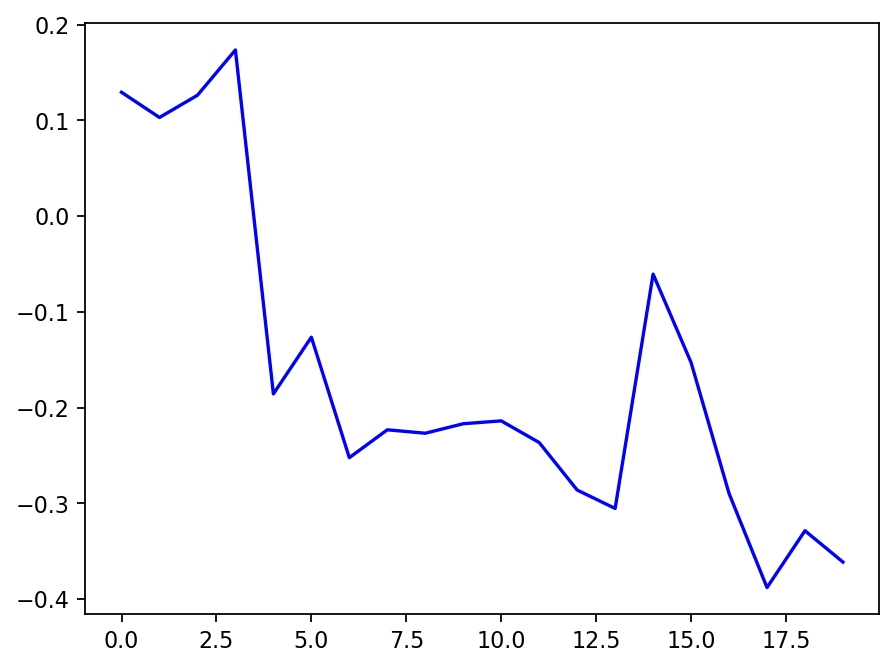

In [10]:
# plotting graph between of average angular velocity of each episode
av_omega =np.zeros(20)
episode=np.zeros(20)
for i in range(20):
    obs = pt.load("/Users/sarvasvakhare/Desktop/exercises/drlfoam/examples/test_training/observations_{}.pt".format(i))
    episode[i]=i
    tr_1 = obs[1]
    av_omega[i]=pt.mean(tr_1['actions'])
plt.plot(episode,av_omega,'b')

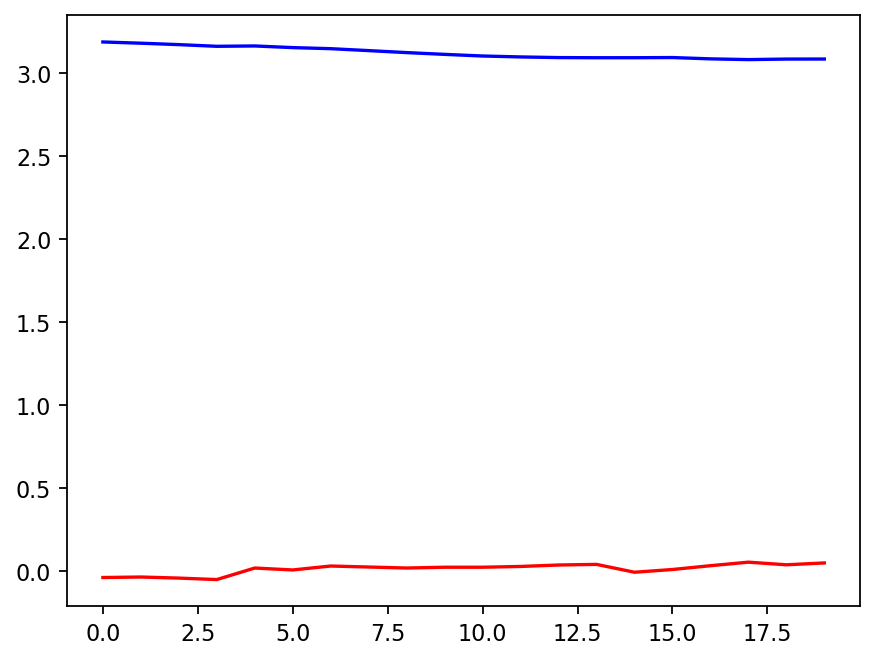

In [15]:
# plotting the graph of cd and cl with respect to each episode(you can see a small drop in Cd,
#since i ran it for only 20 episodes,its not that significant)
cd=np.zeros(20)
cl=np.zeros(20)
episode=np.zeros(20)
for i in range(20):
    obs = pt.load("/Users/sarvasvakhare/Desktop/exercises/drlfoam/examples/test_training/observations_{}.pt".format(i))
    episode[i]=i
    tr_1 = obs[1]
    cd[i]=pt.mean(tr_1['cd'])
    cl[i]=pt.mean(tr_1['cl'])
plt.plot(episode,cd,'b',episode,cl,'r')

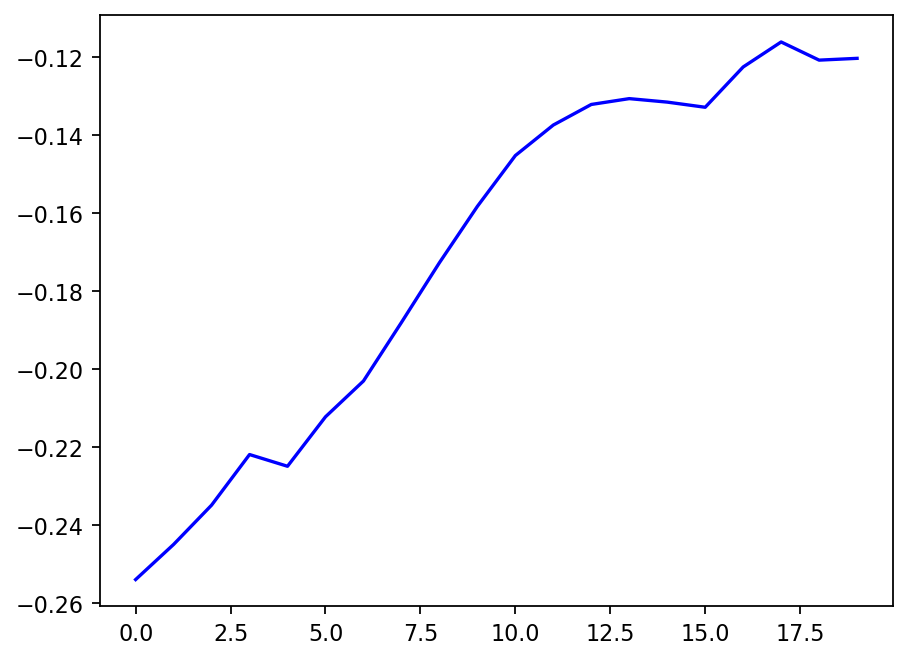

In [16]:
# reward vs episode plot
mean_reward=np.zeros(20)
episode=np.zeros(20)
for i in range(20):
    obs = pt.load("/Users/sarvasvakhare/Desktop/exercises/drlfoam/examples/test_training/observations_{}.pt".format(i))
    episode[i]=i
    tr_1 = obs[1]
    mean_reward[i]=pt.mean(tr_1['rewards'])
plt.plot(episode,mean_reward,'b')

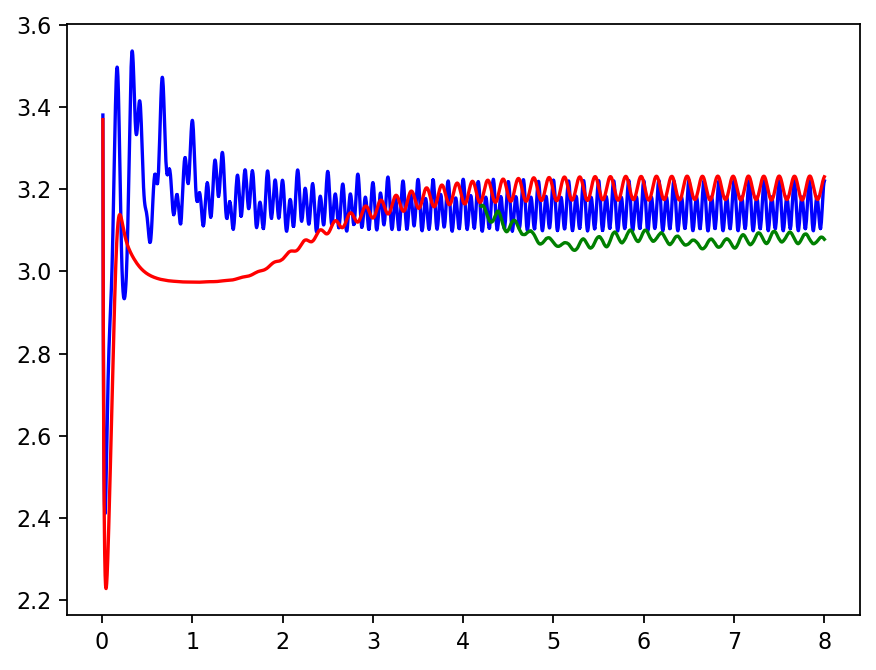

In [14]:
# plotting Cd from three cases : stationary(blue), Open-loop(red), Close-loop(green)
ncdata=cdata.to_numpy() 
ndata=data.to_numpy()
nclosedata=closedata.to_numpy()
plt.plot(ncdata[20:,0],ncdata[20:,1],'b',ndata[20:,0],ndata[20:,1],'r',nclosedata[20:,0],nclosedata[20:,1],'g')